Мы уже многое рассмотрели и если вся эта информация была, возможно, немного неясной, то объединение вышеописанных концепций в выборочном классификаторе, обученном на наборе данных, должно окончательно все прояснить. Поэтому, давайте рассмотрим полный пример распознавания изображений с использованием Keras — от загрузки данных до оценки эффективности модели.

# CNN для классификации набора данных Cifar-10 (Изображения)



Для начала нам понадобится набор данных для обучения. В этом примере мы будем использовать известный набор данных CIFAR-10. CIFAR-10 - это большой набор данных, содержащий более 60000 изображений, представляющих 10 различных классов объектов, таких как "самолет", "автомобиль", "птица", "кошка", "олень", "собака", "лягушка", "лошадь", "корабль" и "грузовик". Изображения CIFAR не центрированы и могут содержать объект на заднем плане, например, самолеты, за которыми может скрываться облачное небо.

Изображения являются полноцветными RGB, но они достаточно малы, всего 32 x 32. Отличительной особенностью набора данных CIFAR-10 является то, что он поставляется в комплекте с Keras, поэтому загрузить набор данных очень просто, а сами изображения нуждаются лишь в минимальной предварительн ообработке.о.

Первое, что мы должны сделать, это импортировать необходимые библиотеки. Мы ещё увидим, как именно этот импорт происходит по ходу дела, а пока же просто имейте в виду, что мы будем использовать Numpy и различные модули, связанные с Keras.

Установка необходимых библиотек:
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org  matplotlib tensorflow scikit-learn seaborn

## Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

## Импортирование и проверка набора данных

Теперь нам нужно осуществить еще один импорт: сам набор данных.
Cifar-10 репозиторий: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
cifar10 = tf.keras.datasets.cifar10

Теперь загрузим набор данных. Мы можем сделать это просто указав, в какие переменные мы хотим загрузить данные, а затем использовать функцию load_data():

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


- Форма данных изображения представляет собой: `(#images, img_heigth, img_width, #channels)`, где каналы представлены в формате RGB (red, green, blue).
- Форма меток такова `(#images, label)`, где метка изменяется от 0 до 9.


In [5]:
train_images[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

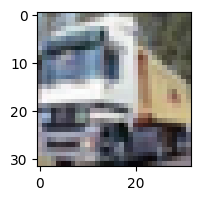

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[1]);

In [7]:
train_labels[1][0]

9

CIFAR метки представляют собой массивы, поэтому нам нужен дополнительный индекс

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
class_names[9] # Индекс списка - это метка

'truck'

In [10]:
idx = train_labels[1][0]
class_names[idx]

'truck'

	 truck


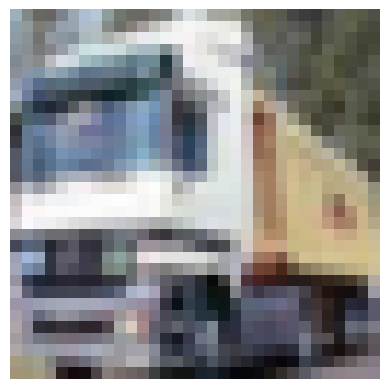

In [11]:
print("\t", class_names[train_labels[1][0]])
plt.imshow(train_images[1])
plt.axis('off');

In [12]:
 def plot_train_img(img, size=2):
    label = train_labels[img][0]
    plt.figure(figsize=(size,size))
    print("Метка {} - {}".format(label, class_names[label]))
    plt.imshow(train_images[img])
    plt.axis('off')
    plt.show()

Метка 9 - truck


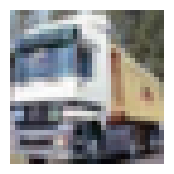

In [13]:
plot_train_img(1)

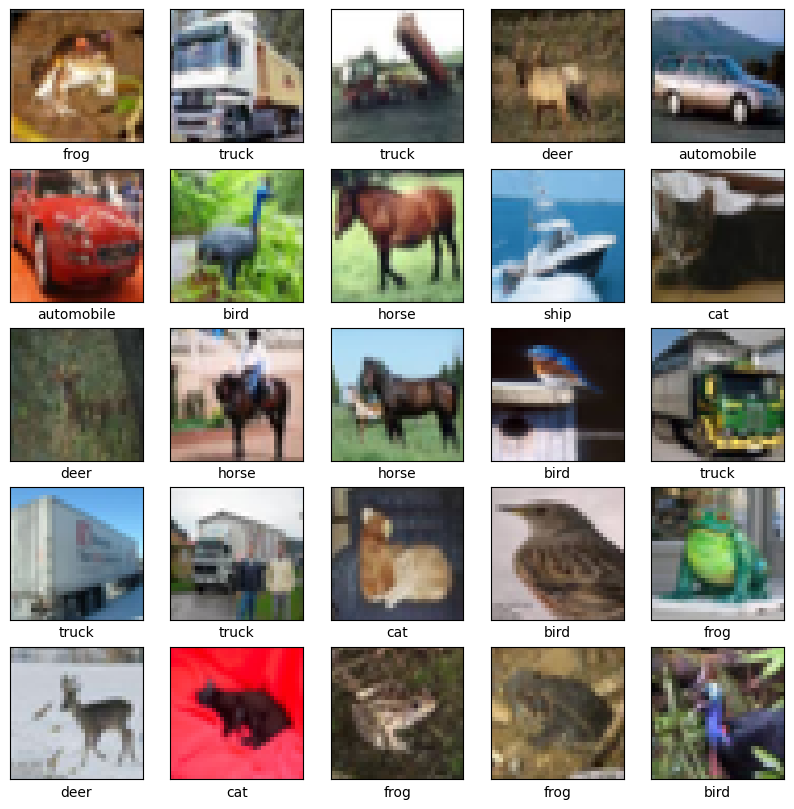

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Обращаем внимание, что изображения цветные, без центрирования и с разным фоном

## Набор данных предварительной обработки

In [15]:
test_images.max()

255

В большинстве случаев нам потребуется выполнить некоторую предварительную обработку наших данных, чтобы подготовить их к использованию, но поскольку мы используем уже готовый и упакованный набор данных, то такая обработка сведена к минимуму. Одним из действий, которые мы хотим сделать, будет нормализация входных данных.

Если значения входных данных находятся в слишком широком диапазоне, это может отрицательно повлиять на работу сети. В нашем случае входными значениями являются пиксели в изображении, которые имеют значение от 0 до 255.

Таким образом, чтобы нормализовать данные, мы можем просто разделить значения изображения на 255. Для этого нам сначала нужно перевести данные в формат с плавающей запятой, поскольку в настоящее время они являются целыми числами. Мы можем сделать это, используя Numpy команду astype(), а затем объявить желаемый тип данных:

In [16]:
# Нормализуем значения пикселей, чтобы они были в диапазоне от 0 до 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
test_images.max()

1.0

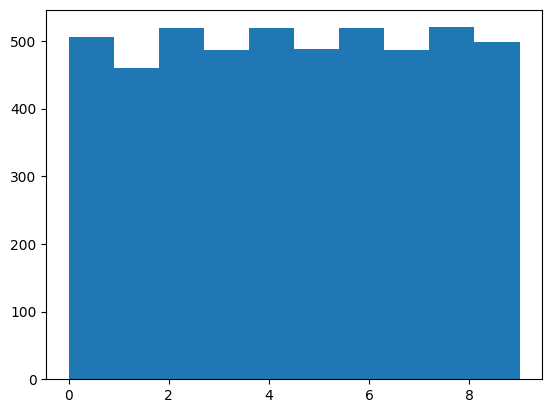

In [18]:
plt.hist(train_labels[:5_000]);

In [19]:
val_images = train_images[:5_000]
val_labels = train_labels[:5_000]
print(val_images.shape, val_labels.shape)

(5000, 32, 32, 3) (5000, 1)


In [20]:
train_images = train_images[5_000:]
train_labels = train_labels[5_000:]
print(train_images.shape, train_labels.shape)

(45000, 32, 32, 3) (45000, 1)


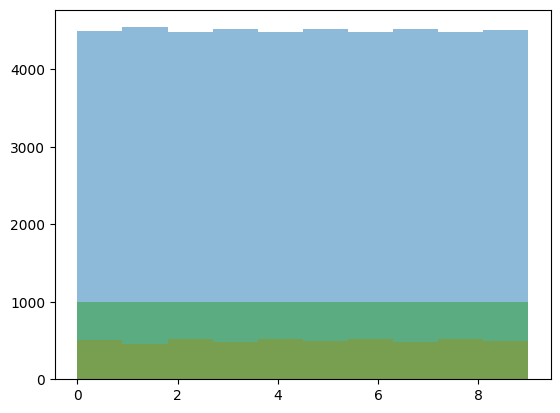

In [21]:
plt.hist(train_labels, alpha=0.5)
plt.hist(val_labels, alpha=0.5)
plt.hist(test_labels, alpha=0.5);

## Создаем архитектуру модели и скомпилируем её

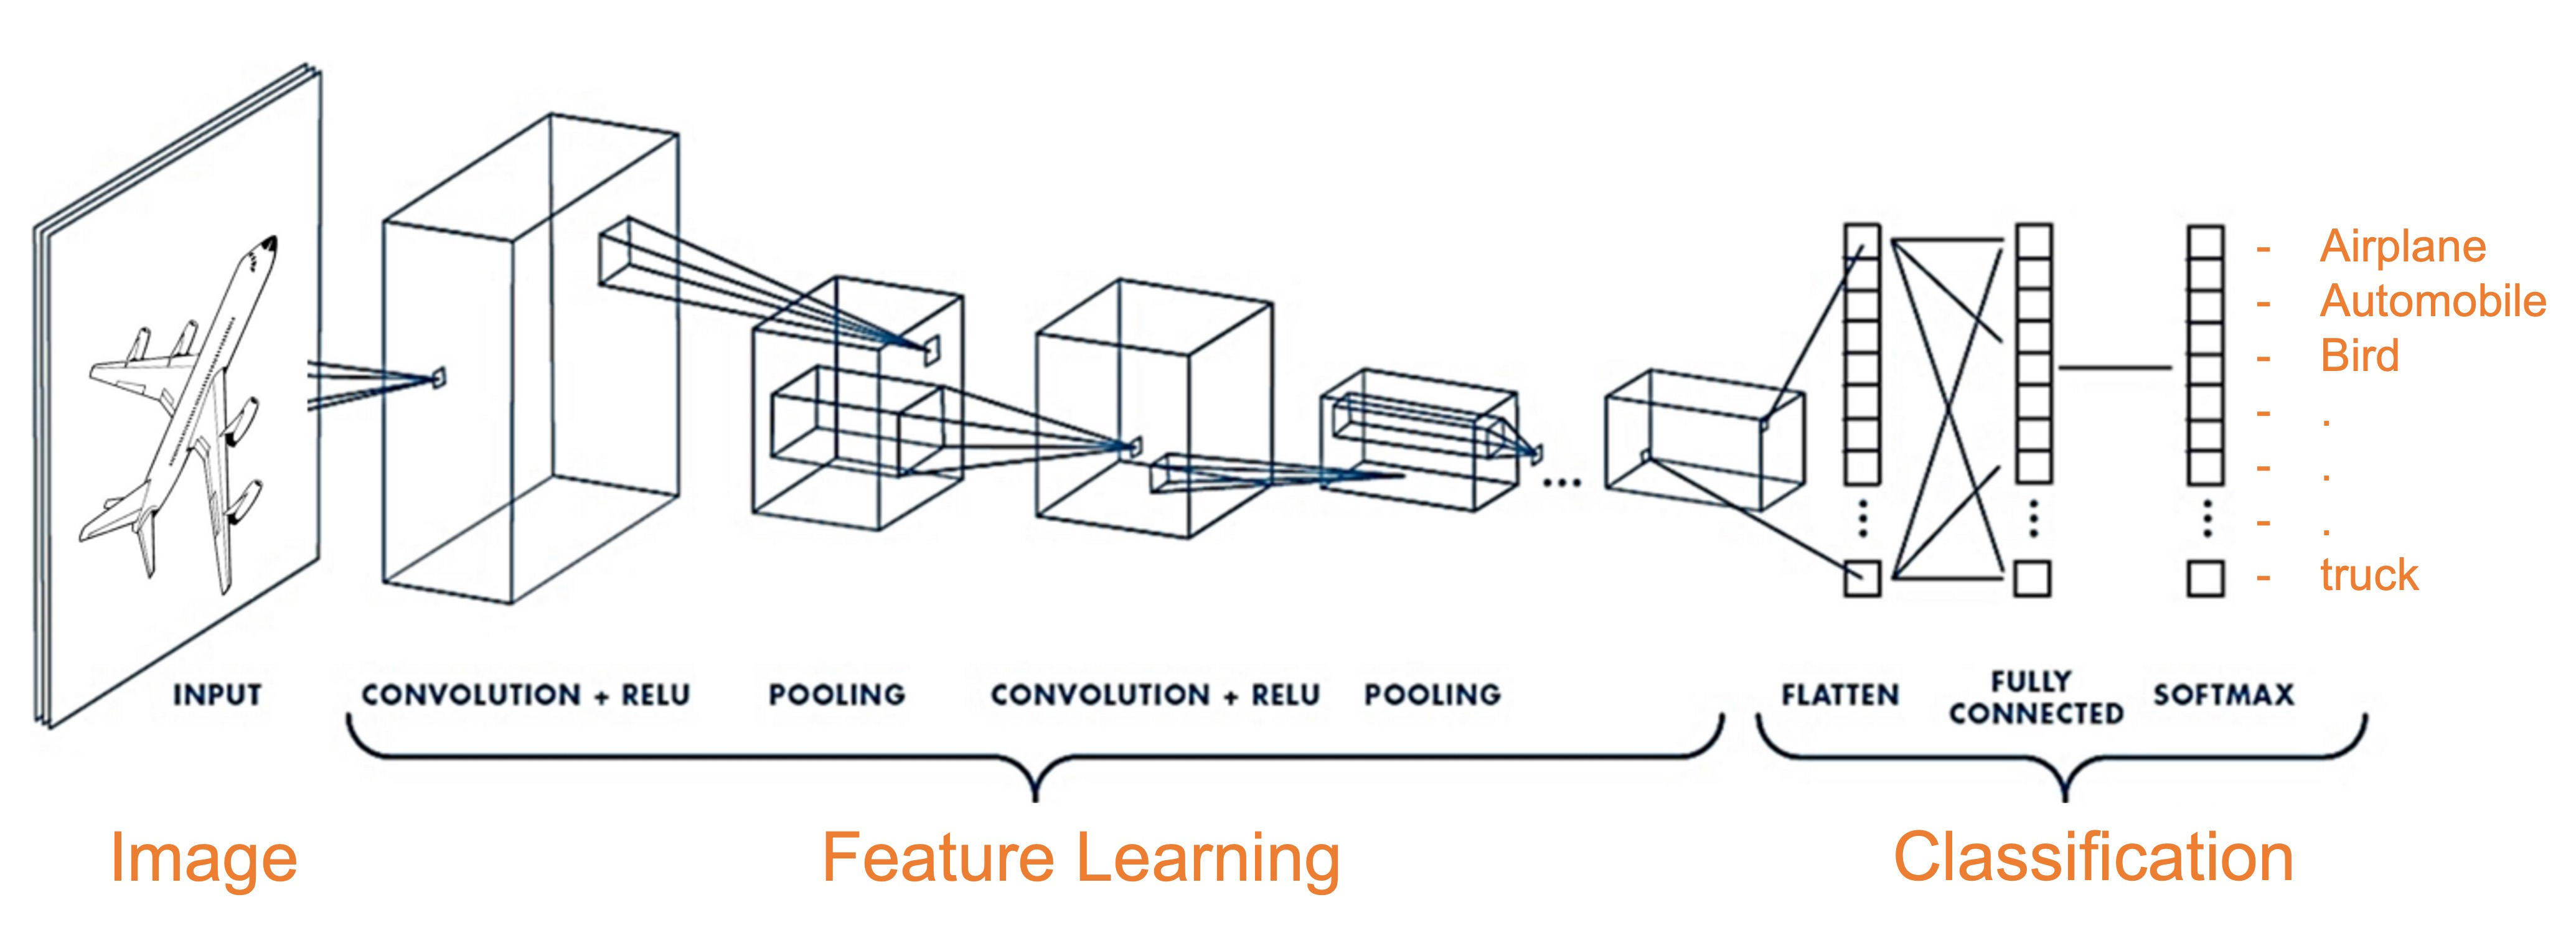

На [Слое свертки](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D),
- шаги - это целое число или кортеж/список из 2 целых чисел, определяющий шаги свертки по высоте и ширине. По умолчанию (1,1).
- заполнение: одно из "допустимых" или "одинаковых" (без учета регистра). По умолчанию = 'valid'.
  - "допустимый" означает отсутствие отступов.  
  - "same" приводит к равномерному заполнению нулями
влево/вправо или вверх /вниз от входного сигнала таким образом, чтобы выходной сигнал имел одинаковую


Мы достигли стадии проектирования модели CNN. Первое, что нужно сделать, это определить формат, который мы хотели бы использовать для модели. У Keras есть несколько различных форматов (планов) для построения моделей, но наиболее часто используется Sequential — поэтому мы импортировали его из Keras.

In [22]:
model = Sequential()

Первый слой нашей модели - это сверточный слой. Он будет принимать входные данные и пропускать их через сверточные фильтры.

При реализации этого в Keras, мы должны указать количество каналов (фильтров), которое нам нужно (а это 32), размер фильтра (3 x 3 в нашем случае), форму входа (при создании первого слоя), функцию активации и отступы.

Как уже упоминалось, relu является наиболее распространенной функцией активации, а отступы мы определим через padding = 'same', то есть, мы не меняем размер изображения:

In [23]:
model.add(Conv2D(
    input_shape=(32, 32, 3),
    filters=32,
    kernel_size=(3,3),
    activation='relu')
)
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



C:\Jupyter\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Мы также можем распечатать сводку по модели, чтобы получить представление о модели в целом.

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Также укажем метрику для оценки.

In [25]:
LOSS = 'sparse_categorical_crossentropy'

Оптимизатор - это то, что настроит веса в вашей сети так, чтобы приблизиться к точке с наименьшими потерями. Алгоритм Адама является одним из наиболее часто используемых оптимизаторов, потому что он дает высокую производительность в большинстве задач:

In [26]:
OPTIMIZER = 'adam'

Теперь скомпилируем модель с выбранными параметрами. Давайте также укажем метрику для оценки.

In [27]:
# Компиляция модели
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

## Обучение

Теперь мы приступаем к обучению модели. Для этого нам нужно вызвать функцию Fit() для модели и передать выбранные параметры. Теперь, когда мы разработали модель, которую хотим использовать, остаётся лишь скомпилировать ее. Давайте укажем количество эпох для обучения, а также оптимизатор, который мы хотим использовать.

In [28]:
NUM_EPOCHS = 20 #Мы можем изменить это значение, если захотим поэкспериментировать с ним, чтобы добиться большей точности

Возьмём тренировочный набор в 50000 образцов и проверочный в 10000 образцов.

Запуск этого куска кода да следующеест:

In [29]:
# Соответствие модели
history = model.fit(train_images,
                    train_labels,
                    epochs=NUM_EPOCHS,
                    validation_data=(val_images, val_labels)
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3572 - loss: 1.7399 - val_accuracy: 0.5402 - val_loss: 1.2935
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5709 - loss: 1.2140 - val_accuracy: 0.6088 - val_loss: 1.1054
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6243 - loss: 1.0684 - val_accuracy: 0.6308 - val_loss: 1.0571
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6652 - loss: 0.9683 - val_accuracy: 0.6632 - val_loss: 0.9663
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6867 - loss: 0.9016 - val_accuracy: 0.6766 - val_loss: 0.9517
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7080 - loss: 0.8369 - val_accuracy: 0.6942 - val_loss: 0.8994
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7273 - loss: 0.7807 - val_accuracy: 0.6880 - val_loss: 0.9121
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7453 - loss: 0

Обратим внимание, что в большинстве случаев вам нужно иметь проверочный набор, отличный от набора для тестирования, поэтому вы должны указать процент данных обучения, которые будут использоваться в качестве набора для проверки. В этом случае мы просто передадим тестовые данные, чтобы убедиться, что тестовые данные отложены и не использовались для обучения. В этом примере мы будем иметь только тестовые данные, чтобы все было проще.):

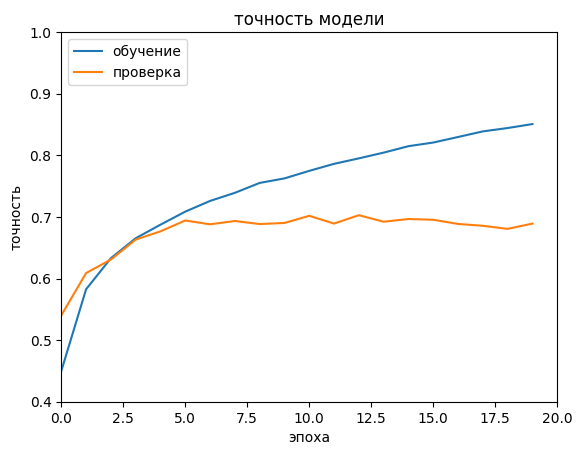

In [30]:
# обобщение истории для обеспечения точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('точность модели')
plt.ylabel('точность')
plt.xlabel('эпоха')
plt.legend(['обучение', 'проверка'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

## Оценка модели

Теперь мы можем оценить модель и посмотреть, как она работает. Просто вызовите model.evaluate():

In [31]:
print("Обучаемые данные: ", model.evaluate(train_images, train_labels)[1])
print("Оценочные данные: ", model.evaluate(val_images, val_labels)[1])
print("Тестовые данные: ", model.evaluate(test_images, test_labels)[1])

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8719 - loss: 0.3688
Обучаемые данные:  0.8722222447395325
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6950 - loss: 1.0873
Оценочные данные:  0.6891999840736389
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6819 - loss: 1.1283
Тестовые данные:  0.6812000274658203


**Точность**
- Обучение: +90%;
- Оценка: 68%-70%
- Тест: 66%-68%

Теоретические и экспериментальные работы по CNN закономерно подводят к вариантам использования нейросетей для решения практических повседневных задач. Одной из задач применения данной модели в сфере распознования и классификации изображений являеться задача по классификации изображения по файлу изображения. 

In [32]:
predictions = np.argmax(model.predict(test_images), axis=-1)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(10000,)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(test_labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.74      0.66      0.70      1000
  automobile       0.78      0.83      0.80      1000
        bird       0.61      0.53      0.56      1000
         cat       0.51      0.50      0.51      1000
        deer       0.63      0.60      0.62      1000
         dog       0.62      0.59      0.60      1000
        frog       0.79      0.71      0.75      1000
       horse       0.65      0.79      0.71      1000
        ship       0.77      0.82      0.80      1000
       truck       0.71      0.78      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [35]:
confusion_matrix(test_labels,predictions)

array([[659,  36,  69,  27,  16,   5,   6,  27,  91,  64],
       [ 10, 827,   6,  12,   2,   3,   9,   8,  32,  91],
       [ 62,  10, 527,  83,  95,  57,  57,  67,  22,  20],
       [ 27,  12,  67, 504,  75, 156,  44,  61,  17,  37],
       [ 21,   5,  63,  63, 601,  48,  47, 124,  15,  13],
       [ 22,  11,  44, 158,  43, 586,  13,  89,  21,  13],
       [ 11,  15,  47,  77,  59,  34, 715,  15,  10,  17],
       [ 14,   8,  23,  38,  41,  44,  10, 793,   6,  23],
       [ 52,  28,  13,  17,  10,   6,   2,  14, 825,  33],
       [ 17, 104,  11,  13,  10,   9,   2,  27,  32, 775]], dtype=int64)

In [36]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

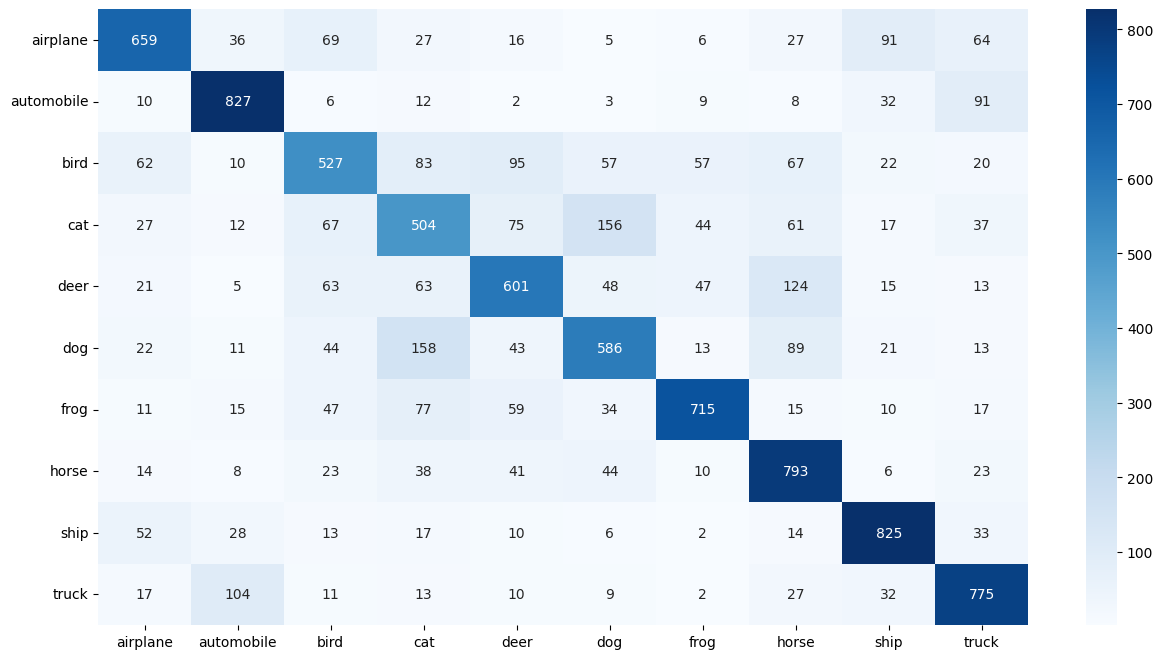

In [37]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap='Blues', annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names);

## Модель тестирования (прогнозирования)

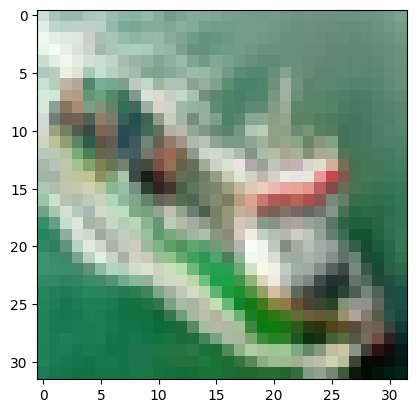

In [38]:
plt.imshow(test_images[15]);

In [39]:
test_labels[15][0]

8

In [40]:
class_names[8]

'ship'

In [41]:
test_images[15].shape

(32, 32, 3)

Входная форма тензора должна быть следующей: (num_images, width, height, color_channels)

In [42]:
my_image = test_images[15]
my_image = my_image.reshape(1,32,32,3)
my_image.shape

(1, 32, 32, 3)

In [43]:
img_pred = np.argmax(model.predict(my_image))
class_names[img_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'frog'

In [44]:
def img_pred(img, size=4):
    label = test_labels[img][0]
    my_image = test_images[img]
    plt.figure(figsize=(size,size))
    plt.imshow(my_image)
    my_image = my_image.reshape(1,32,32,3)
    img_pred = np.argmax(model.predict(my_image))
    pred_label = class_names[img_pred]
    print(" Метка {} <=> Предсказание: {}".format(class_names[label], pred_label))
    plt.grid(False)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
 Метка ship <=> Предсказание: frog


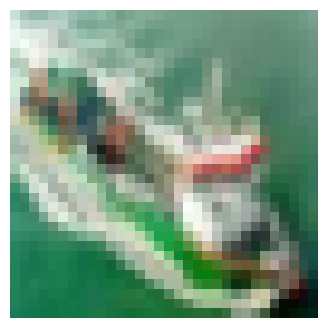

In [45]:
img_pred(15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
 Метка cat <=> Предсказание: cat


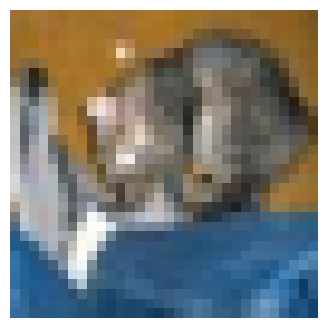

In [46]:
img_pred(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 Метка ship <=> Предсказание: ship


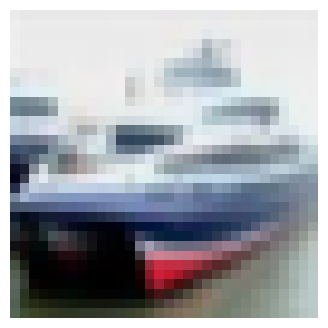

In [47]:
img_pred(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 Метка ship <=> Предсказание: ship


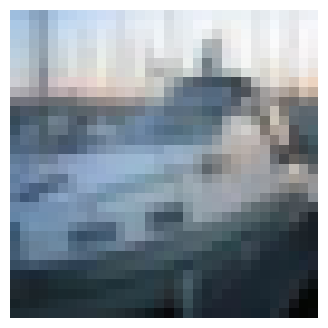

In [48]:
img_pred(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
 Метка airplane <=> Предсказание: airplane


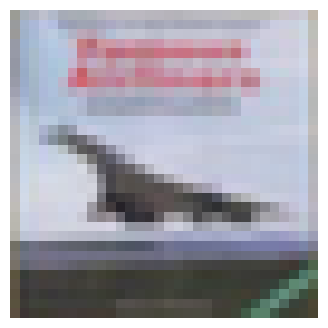

In [49]:
img_pred(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 Метка frog <=> Предсказание: frog


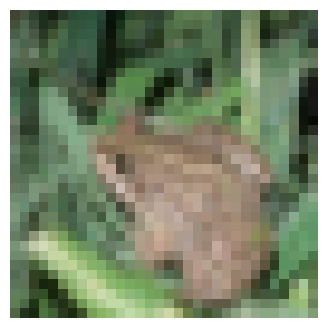

In [50]:
img_pred(4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 Метка frog <=> Предсказание: frog


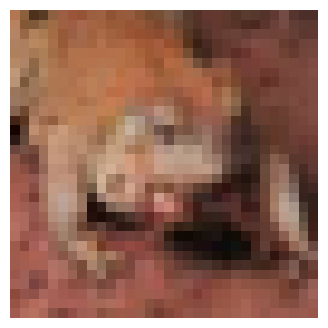

In [51]:
img_pred(5)

## Сохранение модели

In [52]:
model.save('CNN_ImageSearch.h5')

Используем [Netron](https://netron.app) для визуализации модели, гиперпараметров, тензорных фигур и т.д. Neutron - это программа для просмотра моделей нейронных сетей, глубокого обучения и машинного обучения (Смотрите [GitHub](https://github.com/lutzroeder/netron) для получения инструкций по установке на ваш компьютер).

Полученную модель в дальнейшем мы будем использовать через приложение DjML